In [ ]:
pip install patool


     |████████████████████████████████| 81kB 6.1MB/s 


In [ ]:
#these are the only variables you need to update.
datafile_name = "completed_1.1"
emotionfile_name = "clip_and_emotion_1"
loadModel = "/content/drive/MyDrive/microX/post1"
saveModel = "/content/drive/MyDrive/microX/colored_4microx_fullface2_Endplease"
listofMicroX=["mouth","leftEye","rightEye","nose","rightBrow","leftBrow"]


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = "/content/drive/MyDrive/microX/{data}".format(data=datafile_name+".zip")
csvFile = "/content/drive/MyDrive/microX/{label}".format(label=emotionfile_name+".csv")

In [ ]:
import patoolib
patoolib.extract_archive(dataset, outdir="/content/Format/")

patool: Extracting /content/drive/MyDrive/microX/completed_1.1.zip ...
patool: running /usr/bin/7z x -o/content/Format/ -- /content/drive/MyDrive/microX/completed_1.1.zip


PatoolError: ignored

In [ ]:
import os
import shutil
import pandas as pd
classes = pd.read_csv(csvFile)
classes.head()

,Clip Name,Emotion Code
0,S001_001,3
1,S002_001,2
2,S002_002,5
3,S003_001,5
4,S004_001,5


In [ ]:
from glob import glob
listClips = glob("/content/Format/{data}/*".format(data=datafile_name))
print(listClips)


def labeledClips():
  clipList = []
  for i in listClips:
    # i = /content/Format/completed_split/S009_010
    # splitI = [S009_010,S046_004,....]
    splitI = i.split("/")
    clipList.append(splitI[4])
  labeledDF = classes[classes["Clip Name"].isin(clipList)]
  labeledDF['Emotion Code'] =labeledDF['Emotion Code'].astype(int)
  return labeledDF
    

labeledDF = labeledClips()
labeledDF.head()

['/content/Format/completed_1.1/S269_003', '/content/Format/completed_1.1/S100_002', '/content/Format/completed_1.1/S047_001', '/content/Format/completed_1.1/S055_003', '/content/Format/completed_1.1/S257_002', '/content/Format/completed_1.1/S238_007', '/content/Format/completed_1.1/S245_002', '/content/Format/completed_1.1/S258_001', '/content/Format/completed_1.1/S223_002', '/content/Format/completed_1.1/S268_005', '/content/Format/completed_1.1/S174_005', '/content/Format/completed_1.1/S166_016', '/content/Format/completed_1.1/S173_002', '/content/Format/completed_1.1/S040_002', '/content/Format/completed_1.1/S083_004', '/content/Format/completed_1.1/S271_012', '/content/Format/completed_1.1/S226_006', '/content/Format/completed_1.1/S058_008', '/content/Format/completed_1.1/S015_001', '/content/Format/completed_1.1/S157_001', '/content/Format/completed_1.1/S113_001', '/content/Format/completed_1.1/S146_001', '/content/Format/completed_1.1/S071_001', '/content/Format/completed_1.1/S2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Clip Name,Emotion Code
1,S002_001,2
2,S002_002,5
3,S003_001,5
4,S004_001,5
5,S005_001,0


In [ ]:
#split into classes

def reformatFolders(dataframe):
  clipNameList = dataframe["Clip Name"].tolist()
  EmotionCodeList = dataframe["Emotion Code"].tolist()
  for i in range(len(clipNameList)):
    clipToMove = "/content/Format/{data}/{clip}".format(data=datafile_name, clip=clipNameList[i])
    pathToMove = "Classes/{emotion}/{clip}".format(emotion=EmotionCodeList[i],clip=clipNameList[i])
    shutil.move(clipToMove,pathToMove)

reformatFolders(labeledDF)

In [ ]:
#repeat for 1.2 

In [ ]:
def clipNameEmotion(emotion):
  clipList = []
  pathName = "/content/Classes/{emotion}/*".format(emotion=emotion)
  listClips = glob(pathName)

  for i in listClips:
    splitClips = i.split("/")
    clipList.append(splitClips[4])
  return clipList

totalClip= []
for i in range(8):
  totalClip.append(clipNameEmotion(i))
print(totalClip)



[['S268_005', 'S040_002', 'S113_001', 'S167_001', 'S211_015', 'S084_010', 'S181_001', 'S066_008', 'S211_020', 'S134_002', 'S273_011', 'S251_008', 'S210_003', 'S174_001', 'S285_002', 'S057_011', 'S046_003', 'S038_001', 'S181_002', 'S277_001', 'S236_003', 'S200_003', 'S269_002', 'S200_008', 'S273_008', 'S280_004', 'S234_009', 'S170_002', 'S197_001', 'S065_001', 'S049_004', 'S238_009', 'S286_001', 'S049_003', 'S053_003', 'S219_006', 'S168_003', 'S238_004', 'S065_002', 'S271_013', 'S211_012', 'S219_002', 'S042_003', 'S211_014', 'S032_004', 'S273_005', 'S210_006', 'S039_002', 'S211_017', 'S032_006', 'S245_003', 'S268_002', 'S020_001', 'S033_001', 'S112_001', 'S242_001', 'S032_023', 'S274_007', 'S005_001', 'S231_001', 'S057_012', 'S244_010', 'S211_006', 'S219_003', 'S042_002', 'S155_001', 'S251_006', 'S150_001', 'S238_003', 'S279_002', 'S170_001', 'S170_009', 'S107_001', 'S032_017', 'S243_001', 'S253_001', 'S032_016', 'S242_017', 'S163_009', 'S101_002', 'S138_001', 'S032_001', 'S244_023', 'S

In [ ]:
# #step 1 
# ### REPLACE with what emotion you want to segment, repeat step 1 and step 2 as many emotion you want to segment

# emotion=6
# mode = 0 #0 for full face ,1 for ,microX
# microX = "leftBrow"

# clipList2 = []
# for i in totalClip[emotion]:
#   # print(i)
#   if(mode==0):
#     pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = i+ "_frame")
#   if(mode==1):
#     pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = microX)

#   listClips = glob(pathName)
#   clipList2.append(listClips)
# # print(clipList2)

# #[[],[],[]] so there is 144 videos but more frames inside
# resulting_pathname = []
# for i in range(len(clipList2)):
#   frame_no= len(clipList2[i])
#   rounded_frame_no = frame_no - (frame_no%10)

#   # print(frame_no)
#   get_clip_name = clipList2[i][0]
#   get_clip_name = get_clip_name.split("/")
#   get_clip_name = get_clip_name[4]
#   some_list= []
#   for j in range(rounded_frame_no):
#     if(mode==0):
#       pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= get_clip_name + "_frame",frames = get_clip_name + "_frame" + str(j) + ".jpg")
#     if(mode==1):
#       pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= microX ,frames = microX+ get_clip_name + "_frame" + str(j) + ".jpg")

#     some_list.append(pathname)  
#   resulting_pathname.append(some_list)
# print(resulting_pathname)

# segmented_frames = []
# for x in range(len(resulting_pathname)):
#   my_list = resulting_pathname[x]
#   composite_list = [my_list[x:x+10] for x in range(0, len(my_list),10)]
#   segmented_frames.append(composite_list)
# print(segmented_frames)
# #OUTPUT: [vid1[[batch1],[batch2],[..]],[[],[],[]]]


[['/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame0.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame1.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame2.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame3.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame4.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame5.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame6.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame7.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame8.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame9.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame10.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame11.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame12.jpg', '/content/Classes/6/S055_009/leftBrow/leftBrowS055_009_frame13.jpg', '/content/Classes/6/S055_009/leftBrow/left

In [ ]:
# # step 2
# #CHECK missing frames heeree ahahjfdhkasfafd
# ## REPLACE EMOTION 

# emotion = 6

# clipNo = 0
# frameNo = 0
# check_list =[]
# for m in segmented_frames:
#   for m2 in m:
#     path = "Segments/1/{clip}".format(clip=clipNo)
#     # os.makedirs(path, exist_ok=True)
#     for m3 in m2:
#       clipToMove = m3
#       check_list.append(m3)
#       pathToMove = "Segments/{emotion}/{clip}/{frame}.jpg".format(emotion=1,clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
#       frameNo += 1
#       # print(pathToMove)
#       # shutil.move(clipToMove,pathToMove)

#     frameNo = 0
#     clipNo += 1


# print(check_list)


In [ ]:
# import os.path
# from os import path
# for i in check_list:
#   if path.exists(i)==False:
#     print(i)
#     print(path.exists(i))

In [ ]:
# # step 3 
# ##CODE TO CREATE NEW FOLDER WITH NEW SHIT
# ### RUN THIS CELL ONLY AFTER REPLACING FRAMES IN PREVIOUS CELL IF NOT WILL END UP WITH DUPLICATES AND SHIT

# emotion = 2
# import os

# clipNo = 0
# frameNo = 0
# for m in segmented_frames:
#   for m2 in m:
#     path = "Segments/{emotion}/{clip}".format(emotion=emotion,clip=clipNo)
#     os.makedirs(path, exist_ok=True)
#     for m3 in m2:
#       clipToMove = m3
#       pathToMove = "Segments/{emotion}/{clip}/{frame}.jpg".format(emotion=emotion,clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
#       frameNo += 1
#       shutil.move(clipToMove,pathToMove)

#     frameNo = 0
#     clipNo += 1







#     # clipToMove = "/content/Format/{data}/{clip}".format(data=datafile_name, clip=clipNameList[i])
#     # pathToMove = "Classes/{emotion}/{clip}".format(emotion=EmotionCodeList[i],clip=clipNameList[i])
#     # shutil.move(clipToMove,pathToMove)

In [ ]:
def creating_segments(microx,mode):
  for features in microx:
    for j in range(7):
      emotion=j
      clipList2 = []
      for i in totalClip[emotion]:
        # print(i)
        if(mode==0):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = i+ "_frame")
        if(mode==1):
          pathName = "/content/Classes/{emotion}/{clip_no}/{frames}/*".format(emotion=emotion,clip_no = i,frames = features)

        listClips = glob(pathName)
        clipList2.append(listClips)
      # print(clipList2)

      #[[],[],[]] so there is 144 videos but more frames inside
      resulting_pathname = []
      for i in range(len(clipList2)):
        frame_no= len(clipList2[i])
        rounded_frame_no = frame_no - (frame_no%10)

        # print(frame_no)
        get_clip_name = clipList2[i][0]
        get_clip_name = get_clip_name.split("/")
        get_clip_name = get_clip_name[4]
        some_list= []
        for j in range(min(rounded_frame_no,40)):
          if(mode==0):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= get_clip_name + "_frame",frames = get_clip_name + "_frame" + str(j) + ".jpg")
          if(mode==1):
            pathname = "/content/Classes/{emotion}/{clip_no}/{naming}/{frames}".format(emotion=emotion,clip_no = get_clip_name,naming= features ,frames = features+ get_clip_name + "_frame" + str(j) + ".jpg")

          some_list.append(pathname)  
        resulting_pathname.append(some_list)
      # print(resulting_pathname)

      segmented_frames = []
      for x in range(len(resulting_pathname)):
        my_list = resulting_pathname[x]
        composite_list = [my_list[x:x+10] for x in range(0, len(my_list),10)]
        segmented_frames.append(composite_list)
      # print(segmented_frames)
      #OUTPUT: [vid1[[batch1],[batch2],[..]],[[],[],[]]]



      clipNo = 0
      frameNo = 0
      for m in segmented_frames:
        for m2 in m:
          if(mode==1):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= features)
          if(mode==0):
            path = "Segments/{emotion}/{microx}/{clip}".format(emotion=emotion,clip=clipNo,microx= "fullFace")

          os.makedirs(path, exist_ok=True)
          for m3 in m2:
            clipToMove = m3
            if(mode==0):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx =  "fullFace", clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            if(mode==1):
              pathToMove = "Segments/{emotion}/{microx}/{clip}/{frame}.jpg".format(emotion=emotion,microx = features, clip=clipNo,frame=str(clipNo)+"frame"+str(frameNo))
            frameNo += 1
            # print(clipToMove,pathToMove)
            shutil.move(clipToMove,pathToMove)


          frameNo = 0
          clipNo += 1


creating_segments(listofMicroX,1)
creating_segments(["fullface"],0)

In [ ]:
##this is to export segmented data
##replace 1st arg with new name of zip
import shutil
shutil.make_archive('Segments_emotions', 'zip', 'Segments')

'/content/Segments_emotions.zip'

In [ ]:

def clipNameEmotion(emotion,feature):
  clipList = []
  pathName = "/content/Segments/{emotion}/{microx}/*".format(emotion=emotion,microx=feature)
  listClips = glob(pathName)
  for i in listClips:
    splitClips = i.split("/")
    clipList.append(splitClips[5])
  return clipList

newTotalClip= []
for e in listofMicroX:
  for i in range(7):
    newTotalClip.append(clipNameEmotion(i,e))
print(newTotalClip)


[['361', '288', '418', '125', '227', '120', '91', '404', '384', '339', '151', '201', '146', '179', '89', '84', '78', '285', '277', '439', '208', '313', '214', '15', '318', '414', '360', '447', '172', '373', '409', '232', '119', '408', '294', '440', '87', '54', '76', '411', '305', '107', '282', '27', '13', '385', '359', '21', '388', '311', '317', '141', '337', '140', '425', '80', '456', '171', '221', '293', '377', '79', '415', '124', '413', '159', '350', '4', '193', '396', '296', '127', '40', '340', '104', '2', '32', '403', '72', '362', '143', '38', '428', '203', '168', '188', '17', '348', '41', '299', '37', '181', '341', '375', '185', '354', '394', '243', '399', '47', '70', '186', '231', '329', '273', '306', '96', '112', '105', '430', '30', '166', '321', '77', '137', '51', '433', '419', '219', '252', '406', '298', '402', '3', '349', '56', '175', '369', '443', '63', '280', '194', '346', '295', '128', '174', '398', '136', '364', '180', '182', '269', '10', '60', '28', '435', '145', '310',

In [ ]:
#get pixel for each frames sequentially FOR MOUTH
#[pixels_frame1,pixels_frame2,...]

#frames_list is pixel of all frames in one vid
#X will be list of framelist for 100(?) vids
import cv2
import numpy as np
img_height , img_width = 60, 60

def unpackPixel(emotion,microExpression,clipName):
  frames_list=[]
  for i in range(10):
    pathName = '/content/Segments/{emotion}/{microx}/{clip}/{filename}.jpg'.format(emotion = emotion, microx=microExpression, clip = clipName  ,  filename = clipName + "frame" + str(i) )
    # frames_list.append(pathName)
    img= cv2.imread(pathName)
    # norm_img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    if(microExpression=="fullFace"):
      img = cv2.resize(img, (img_height, img_width))

    frames_list.append(img)

  return frames_list

def create_data(listOfClipForEmotion,microx):
    X = []
    Y = []
    counter=0
    classes_list=["0","1","2","3","4","5","6"]      
    for c in classes_list:
        limit=0
        for f in listOfClipForEmotion[int(c)]: #number of clip in each MOUTH classes
           limit +=1
           if (limit<450):
            frames = unpackPixel(c,microx,f)
            if len(frames) == 10: #where we can split data instead of simply getting 1st 10
              X.append(frames)
              counter += 1
              y = [0]*len(classes_list)
              y[classes_list.index(c)] = 1
              Y.append(y)
    print(counter)
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X,Y
 

X_m,Y_m = create_data(newTotalClip,"mouth")
X_re, Y_re = create_data(newTotalClip,"rightEye")
X_le,Y_le = create_data(newTotalClip,"leftEye")
X_n,Y_n = create_data(newTotalClip,"nose")
X_rb,Y_rb = create_data(newTotalClip,"rightBrow")
X_lb,Y_lb = create_data(newTotalClip,"leftBrow")


# to add in main frame
X_main, Y_main = create_data(newTotalClip,"fullFace")



2562
2562
2562
2562
2562
2562
2562


In [ ]:
#join the 2 files tgt here

In [ ]:
print(X_m.dtype)
print(X_main.dtype)

print(X_m.shape)
print(X_main.shape)

uint8
uint8
(2562, 10, 60, 60, 3)
(2562, 10, 60, 60, 3)


In [ ]:
print(Y_m)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
from sklearn.model_selection import train_test_split


X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, Y_m, test_size=0.20, shuffle=True, random_state=0)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, Y_n, test_size=0.20, shuffle=True, random_state=0)
X_rb_train, X_rb_test, y_rb_train, y_rb_test = train_test_split(X_rb, Y_rb, test_size=0.20, shuffle=True, random_state=0)
X_lb_train, X_lb_test, y_lb_train, y_lb_test = train_test_split(X_lb, Y_lb, test_size=0.20, shuffle=True, random_state=0)
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, Y_re, test_size=0.20, shuffle=True, random_state=0)
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, Y_le, test_size=0.20, shuffle=True, random_state=0)
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, Y_main, test_size=0.20, shuffle=True, random_state=0)

In [ ]:
print(X_m_train.shape)
print(y_m_train.shape)
print(X_n_train.shape)
print(y_n_train.shape)
print(X_rb_train.shape)
print(y_rb_train.shape)

(2049, 10, 60, 60, 3)
(2049, 7)
(2049, 10, 60, 60, 3)
(2049, 7)
(2049, 10, 60, 60, 3)
(2049, 7)


In [ ]:
print(y_m_train)
print(X_m_train)
print(y_m_train==y_n_train)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[[[[[ 41  72 117]
    [ 43  74 119]
    [ 44  75 120]
    ...
    [ 41  77 115]
    [ 41  77 115]
    [ 41  77 115]]

   [[ 41  72 117]
    [ 43  74 119]
    [ 44  75 120]
    ...
    [ 42  78 116]
    [ 41  77 115]
    [ 41  77 115]]

   [[ 41  72 117]
    [ 43  74 119]
    [ 44  75 120]
    ...
    [ 42  78 116]
    [ 42  78 116]
    [ 41  77 115]]

   ...

   [[ 46  75 114]
    [ 46  75 114]
    [ 47  76 115]
    ...
    [ 62  92 133]
    [ 66  97 136]
    [ 68  99 138]]

   [[ 48  77 116]
    [ 49  78 117]
    [ 50  79 118]
    ...
    [ 63  93 134]
    [ 66  97 136]
    [ 68  99 138]]

   [[ 49  78 117]
    [ 49  78 117]
    [ 51  80 119]
    ...
    [ 63  93 134]
    [ 66  97 136]
    [ 69 100 139]]]


  [[[ 40  69 120]
    [ 45  74 125]
    [ 46  76 125]
    ...
    [ 39  75 113]
    [ 39  74 114]
    [ 38  73 113]]

   [[ 41  70 121]
    [ 45  74 125]
    [ 46

In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
# model = Sequential()
# model.add(ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last", input_shape = (10, 60, 60, 3)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(7, activation = "softmax"))
 
# model.summary()
 
# opt = keras.optimizers.SGD(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
# earlystop = EarlyStopping(patience=7)
# callbacks = [earlystop]
 
# history = model.fit(x = X_m_train, y = y_m_train, epochs=30, batch_size = 16 , shuffle=True, validation_split=0.2, callbacks=callbacks)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 58, 58, 64)        154624    
_________________________________________________________________
dropout_2 (Dropout)          (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               55116032  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 55,272,455
Trainable params: 55,272,455
Non-trainable params: 0
__________________________________________

Run the next two cells to train the model based on a previously saved model. Indicate the folder where the model is saved in variable "savedModel" in the first few blocks above

In [ ]:
model = keras.models.load_model(loadModel)
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fada8525ba8>>

In [ ]:
opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

history = model.fit([X_m_train,X_n_train, X_rb_train, X_lb_train, X_re_train, X_le_train],y_m_train, epochs=30, batch_size = 8 , shuffle=True, validation_split=0.2, callbacks=callbacks)
model.save(saveModel)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Run below if training model from scratch

In [ ]:
from keras.models import Input, Model
from keras.layers import Dense

inputA = Input(shape=(10, 60, 60, 3))
a = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputA)
a = Dropout(0.2)(a)
a = Flatten()(a)
a = Dense(256,activation="relu")(a)
a = Dropout(0.3)(a)
a = Dense(7,activation="softmax")(a)
model1 = Model(inputs=inputA ,outputs=a)

inputB = Input(shape=(10, 60, 60, 3))
b = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputB)
b = Dropout(0.2)(b)
b = Flatten()(b)
b = Dense(256,activation="relu")(b)
b = Dropout(0.3)(b)
b = Dense(7,activation="softmax")(b)
model2 = Model(inputs=inputB ,outputs=b)

inputC = Input(shape=(10, 60, 60, 3))
c = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputC)
c = Dropout(0.2)(c)
c = Flatten()(c)
c = Dense(256,activation="relu")(c)
c = Dropout(0.3)(c)
c = Dense(7,activation="softmax")(c)
model3 = Model(inputs=inputC ,outputs=c)

inputD = Input(shape=(10, 60, 60, 3))
d = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputD)
d = Dropout(0.2)(d)
d = Flatten()(d)
d = Dense(256,activation="relu")(d)
d = Dropout(0.3)(d)
d = Dense(7,activation="softmax")(d)
model4 = Model(inputs=inputD ,outputs=d)

inputE = Input(shape=(10, 60, 60, 3))
e = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputE)
e = Dropout(0.2)(e)
e = Flatten()(e)
e = Dense(256,activation="relu")(e)
e = Dropout(0.3)(e)
e = Dense(7,activation="softmax")(e)
model5 = Model(inputs=inputE ,outputs=e)

# inputF = Input(shape=(10, 60, 60, 3))
# f = ConvLSTM2D(filters = 64, kernel_size = (3, 3), return_sequences = False, data_format = "channels_last")(inputF)
# f = Dropout(0.2)(f)
# f = Flatten()(f)
# f = Dense(256,activation="relu")(f)
# f = Dropout(0.3)(f)
# f = Dense(7,activation="softmax")(f)
# model6 = Model(inputs=inputF ,outputs=f)

combined = concatenate([model1.output, model2.output, model3.output, model4.output, model5.output])
# z = Dense(256, activation="relu")(combined)
z = Dense(7, activation="softmax")(combined)
model= Model(inputs=[model1.input, model2.input, model3.input, model4.input, model5.input],outputs=z)
# model = keras.models.load_model(savedModel)

opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]
 
history = model.fit([X_m_train,X_n_train, X_re_train, X_le_train, X_main_train],y_m_train, epochs=30, batch_size = 4 , shuffle=True, validation_split=0.2, callbacks=callbacks)
model.save(saveModel)

Epoch 1/30
439/439 [==============================] - 155s 352ms/step - loss: 1.8943 - accuracy: 0.2160 - val_loss: 1.8801 - val_accuracy: 0.2437
Epoch 2/30
439/439 [==============================] - 153s 349ms/step - loss: 1.8777 - accuracy: 0.2251 - val_loss: 1.8809 - val_accuracy: 0.2415
Epoch 3/30
439/439 [==============================] - 153s 348ms/step - loss: 1.8658 - accuracy: 0.2393 - val_loss: 1.8680 - val_accuracy: 0.2415
Epoch 4/30
439/439 [==============================] - 152s 347ms/step - loss: 1.8535 - accuracy: 0.2422 - val_loss: 1.9487 - val_accuracy: 0.1549
Epoch 5/30
439/439 [==============================] - 153s 347ms/step - loss: 1.8436 - accuracy: 0.2519 - val_loss: 1.8539 - val_accuracy: 0.2392
Epoch 6/30
439/439 [==============================] - 152s 346ms/step - loss: 1.8354 - accuracy: 0.2558 - val_loss: 1.8512 - val_accuracy: 0.2528
Epoch 7/30
439/439 [==============================] - 152s 347ms/step - loss: 1.8221 - accuracy: 0.2678 - val_loss: 1.8295 -

In [ ]:
pred = model.predict([X_m_test,X_n_test, X_rb_test, X_lb_test, X_re_test, X_le_test])
print(pred)
predicted_output = np.argmax(pred,axis=1)
print(predicted_output)

[[0.11638138 0.10855854 0.07581624 ... 0.03878935 0.45640755 0.06317961]
 [0.18908648 0.06180088 0.08174597 ... 0.03257573 0.37435365 0.13441138]
 [0.1602716  0.06702469 0.07887774 ... 0.03638549 0.4056995  0.11682506]
 ...
 [0.17282923 0.150001   0.10199668 ... 0.03580228 0.14687148 0.19786745]
 [0.13469508 0.09439781 0.10300839 ... 0.03692316 0.4259147  0.12137903]
 [0.26170206 0.10371561 0.10782094 ... 0.02795368 0.2831046  0.13115631]]
[5 5 5 5 0 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 0 5 5 0 5 5 5 5 5 3 5 5 5 5 5
 5 0 5 5 5 5 5 5 5 0 0 5 3 5 5 5 6 5 5 5 5 5 0 5 6 5 5 5 5 5 5 6 5 5 0 6 5
 5 5 3 5 5 5 5 0 5 5 0 5 0 5 5 5 5 5 3 0 5 0 5 5 0 5 5 5 0 0 5 5 5 6 5 5 5
 6 5 5 5 5 3 5 5 5 1 5 0 5 5 5 6 6 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5
 5 5 0 5 5 0 5 6 0 5 5 5 5 1 5 6 5 0 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 6
 5 3 5 5 1 5 5 5 5 5 5 5 5 5 6 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 0 5 6 0 5 5 5
 5 0 0 6 5 5 0 5 5 0 6 5 5 5 5 5 0 5 5 5 5 0 5 5 5 5 5 6 5 5 3 0 5 5 5 5 5
 0 5 5 5 5 5 5 5 0 5 5 5 5 5 5 

In [ ]:
print(y_m_test)
y_output = np.argmax(y_m_test,axis=1)
print(y_output)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
[1 4 4 0 6 6 4 1 3 6 5 5 5 2 6 3 6 5 5 5 3 5 3 6 2 0 5 1 5 1 0 3 3 0 1 0 6
 3 0 3 5 6 1 1 0 1 6 0 6 3 2 1 6 1 6 0 2 1 2 0 0 0 6 5 3 6 5 6 2 1 2 6 0 5
 2 1 3 4 6 0 5 3 6 0 1 6 4 3 5 3 6 1 3 0 6 6 4 0 2 2 5 5 0 5 6 1 2 0 2 5 6
 0 5 0 6 0 0 3 3 6 0 6 6 5 5 2 6 0 1 3 3 6 1 5 5 0 6 1 3 6 2 3 1 5 1 0 3 6
 5 2 5 0 2 5 0 1 4 5 2 5 5 6 5 1 1 1 0 0 2 2 4 1 1 5 5 6 6 5 3 1 0 1 0 0 3
 5 6 5 6 3 2 3 4 5 1 6 5 3 2 2 5 3 5 0 2 0 1 5 4 1 0 3 5 0 3 0 6 2 0 1 2 5
 5 0 6 6 5 6 5 1 6 1 6 1 6 5 6 2 6 5 5 5 5 0 6 3 1 6 2 1 5 3 3 5 5 0 5 6 1
 5 6 0 2 0 0 0 5 6 0 6 6 1 6 3 6 6 1 0 1 1 6 5 0 4 2 1 0 2 1 2 5 3 1 5 0 5
 3 2 1 0 0 1 1 1 1 0 1 1 3 2 3 0 6 5 5 6 3 3 5 5 4 6 6 3 2 1 2 6 5 0 5 0 1
 3 6 1 5 5 6 5 6 3 2 2 5 0 6 5 1 4 1 3 2 5 1 0 6 6 0 1 0 4 1 2 1 5 4 6 1 5
 3 5 1 1 0 6 2 3 2 5 0 0 5 2 6 0 5 5 5 0 1 6 5 6 6 1 3 5 6 0 1 6 5 1 6 5 4
 1 2 3 3 1 5 6 3 1 2 2 5 5 6 2 3 5 6 6 5 1 5 0 6 5 2 0 

In [ ]:
model.save(saveModel)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/microX/colored_4microx/assets


In [ ]:
print(saveModel)

/content/drive/MyDrive/microX/colored_4microx


In [ ]:
model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 10, 60, 60,  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 10, 60, 60,  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 10, 60, 60,  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 10, 60, 60,  0                                            
______________________________________________________________________________________

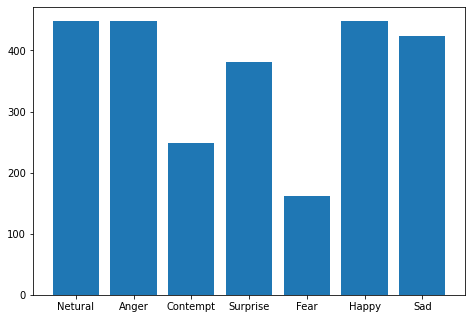

In [ ]:
#check if data equally distributed
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# y_m['emotion'].value_counts().plot(kind='bar')
# plt.show()
import numpy as np
emotion_counts = Y_m.sum(axis=0)
emotionlabels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
ax.bar(emotionlabels,emotion_counts)
plt.show()

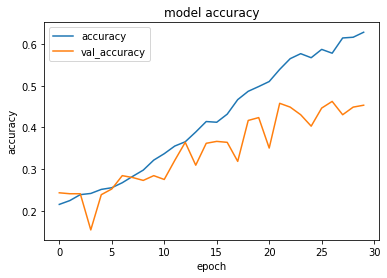

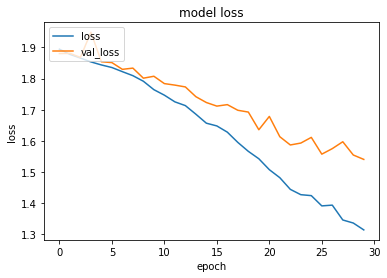

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
#output array with emotion
def predictedEmotion(possibleEmotion):
  emotionOutput = []
  for i in possibleEmotion:
    likelyEmotion = np.argmax(i)
    emotionOutput.append(likelyEmotion)
  return np.array(emotionOutput)


predictedEmotionArray = predictedEmotion(pred)
print(predictedEmotionArray)

[5 5 5 5 0 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 0 5 5 0 5 5 5 5 5 3 5 5 5 5 5
 5 0 5 5 5 5 5 5 5 0 0 5 3 5 5 5 6 5 5 5 5 5 0 5 6 5 5 5 5 5 5 6 5 5 0 6 5
 5 5 3 5 5 5 5 0 5 5 0 5 0 5 5 5 5 5 3 0 5 0 5 5 0 5 5 5 0 0 5 5 5 6 5 5 5
 6 5 5 5 5 3 5 5 5 1 5 0 5 5 5 6 6 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5
 5 5 0 5 5 0 5 6 0 5 5 5 5 1 5 6 5 0 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 6
 5 3 5 5 1 5 5 5 5 5 5 5 5 5 6 6 5 5 6 5 5 5 5 5 5 5 5 5 5 5 0 5 6 0 5 5 5
 5 0 0 6 5 5 0 5 5 0 6 5 5 5 5 5 0 5 5 5 5 0 5 5 5 5 5 6 5 5 3 0 5 5 5 5 5
 0 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 0 5 5 5 5 5 5 5 5 5
 5 0 0 0 5 5 5 0 5 0 5 0 5 5 5 5 5 5 5 5 5 5 5 5 3 0 0 5 0 5 6 0 5 5 5 3 5
 5 3 0 5 0 5 5 6 5 6 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 6 5 5 5 5 1 5 5
 5 5 0 5 6 6 5 5 5 6 0 0 5 5 0 1 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 0 5 5 0 5 5
 5 3 5 5 5 5 0 3 0 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 6 5 0 5 5 5 5 5 5 5 5 5 5
 5 5 6 5 5 5 0 6 5 5 5 5 6 0 0 5 5 5 5 5 5 6 5 5 5 0 0 5 0 5 5 5 0 6 5 5 5
 5 5 5 6 5 0 3 5 6 0 5 5 

[1 4 4 0 6 6 4 1 3 6 5 5 5 2 6 3 6 5 5 5 3 5 3 6 2 0 5 1 5 1 0 3 3 0 1 0 6
 3 0 3 5 6 1 1 0 1 6 0 6 3 2 1 6 1 6 0 2 1 2 0 0 0 6 5 3 6 5 6 2 1 2 6 0 5
 2 1 3 4 6 0 5 3 6 0 1 6 4 3 5 3 6 1 3 0 6 6 4 0 2 2 5 5 0 5 6 1 2 0 2 5 6
 0 5 0 6 0 0 3 3 6 0 6 6 5 5 2 6 0 1 3 3 6 1 5 5 0 6 1 3 6 2 3 1 5 1 0 3 6
 5 2 5 0 2 5 0 1 4 5 2 5 5 6 5 1 1 1 0 0 2 2 4 1 1 5 5 6 6 5 3 1 0 1 0 0 3
 5 6 5 6 3 2 3 4 5 1 6 5 3 2 2 5 3 5 0 2 0 1 5 4 1 0 3 5 0 3 0 6 2 0 1 2 5
 5 0 6 6 5 6 5 1 6 1 6 1 6 5 6 2 6 5 5 5 5 0 6 3 1 6 2 1 5 3 3 5 5 0 5 6 1
 5 6 0 2 0 0 0 5 6 0 6 6 1 6 3 6 6 1 0 1 1 6 5 0 4 2 1 0 2 1 2 5 3 1 5 0 5
 3 2 1 0 0 1 1 1 1 0 1 1 3 2 3 0 6 5 5 6 3 3 5 5 4 6 6 3 2 1 2 6 5 0 5 0 1
 3 6 1 5 5 6 5 6 3 2 2 5 0 6 5 1 4 1 3 2 5 1 0 6 6 0 1 0 4 1 2 1 5 4 6 1 5
 3 5 1 1 0 6 2 3 2 5 0 0 5 2 6 0 5 5 5 0 1 6 5 6 6 1 3 5 6 0 1 6 5 1 6 5 4
 1 2 3 3 1 5 6 3 1 2 2 5 5 6 2 3 5 6 6 5 1 5 0 6 5 2 0 3 0 0 1 5 5 1 6 6 0
 5 2 0 2 6 5 1 5 1 1 1 4 6 1 1 5 6 3 3 0 5 5 4 6 0 4 5 1 0 3 2 5 0 6 5 6 3
 2 2 5 0 5 6 3 3 3 5 3 0 

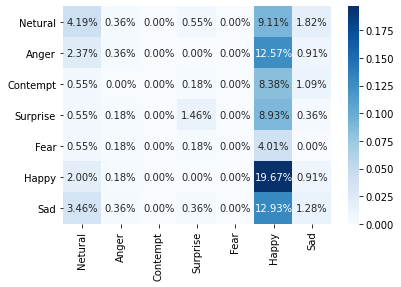

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
print(predictedEmotion(y_m_test))
cf_matrix = confusion_matrix(predictedEmotion(y_m_test), predictedEmotionArray)
sns.heatmap(cf_matrix/np.sum(cf_matrix), xticklabels=labels, yticklabels=labels, annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cf_matrix2 = multilabel_confusion_matrix(predictedEmotion(y_m_test), predictedEmotionArray)
print(cf_matrix2)

[[[409  52]
  [ 65  23]]

 [[453   7]
  [ 87   2]]

 [[493   0]
  [ 56   0]]

 [[479   7]
  [ 55   8]]

 [[522   0]
  [ 27   0]]

 [[117 307]
  [ 17 108]]

 [[420  28]
  [ 94   7]]]


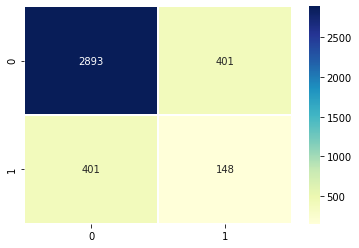

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
letssee = cf_matrix2.sum(axis=0)
df_cm = pd.DataFrame(letssee, range(2), range(2))
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu") # font size

plt.show()

In [ ]:
#split data into individual emotions, show the next highest emotion

def groupByEmotion(predictedEmotion,emo):
  eList = []
  for i in range(len(predictedEmotion)):
    if predictedEmotion[i] == emo :
      eList.append(pred[i])
  return eList

def secondHighestEmotion(emotionList):
  secondEmotion = [] 
  for i in emotionList:
    list1 = i.tolist()
    x = sorted(list1)[-2]
    secondEmotion.append(list1.index(x))
  return secondEmotion

def emotionName(codedEmotion):
  newList= []
  labels = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
  for i in codedEmotion:
    newList.append(labels[i])
  return newList

Neutral = groupByEmotion(predictedEmotionArray,0)
NeutralCorr = emotionName(secondHighestEmotion(Neutral))

anger = groupByEmotion(predictedEmotionArray,1)
angerCorr = emotionName(secondHighestEmotion(anger))

contempt = groupByEmotion(predictedEmotionArray,2)
contemptCorr = emotionName(secondHighestEmotion(contempt))

surprise = groupByEmotion(predictedEmotionArray,3)
surpriseCorr = emotionName(secondHighestEmotion(surprise))

fear = groupByEmotion(predictedEmotionArray,4)
fearCorr = emotionName(secondHighestEmotion(fear))

happy = groupByEmotion(predictedEmotionArray,5)
happyCorr = emotionName(secondHighestEmotion(happy))

sad = groupByEmotion(predictedEmotionArray,6)
sadCorr = emotionName(secondHighestEmotion(sad))

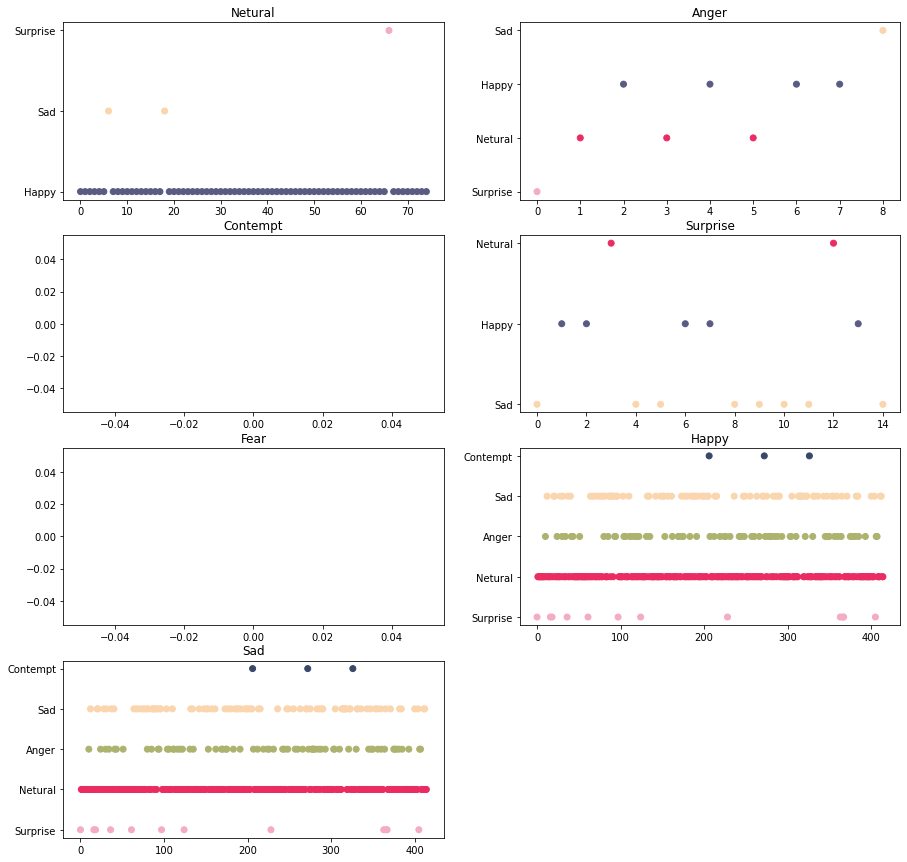

In [ ]:
Expressions = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(4, 2, 1)
ax1 = fig.add_subplot(4, 2, 2)
ax2 = fig.add_subplot(4, 2, 3)
ax3 = fig.add_subplot(4, 2, 4)
ax4 = fig.add_subplot(4, 2, 5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)

def color(corr):
  colorList = []
  colors = ['#ea2c62','#adb36e','#394867','#f4abc4','#1f6f8b','#595b83','#fad5ad']
  for i in corr:
    colorList.append(colors[i])
  return colorList

ax.scatter(range(0, len(NeutralCorr)),NeutralCorr,c = color(secondHighestEmotion(Neutral)) )
ax1.scatter(range(0, len(angerCorr)),angerCorr,c = color(secondHighestEmotion(anger)) )
ax2.scatter(range(0, len(contemptCorr)),contemptCorr,c = color(secondHighestEmotion(contempt)) )
ax3.scatter(range(0, len(surpriseCorr)),surpriseCorr,c = color(secondHighestEmotion(surprise)) )
ax4.scatter(range(0, len(fearCorr)),fearCorr,c = color(secondHighestEmotion(fear)) )
ax5.scatter(range(0, len(happyCorr)),happyCorr,c = color(secondHighestEmotion(happy)) )
ax6.scatter(range(0, len(happyCorr)),happyCorr,c = color(secondHighestEmotion(happy)) )


ax.title.set_text('Netural')
ax1.title.set_text('Anger')
ax2.title.set_text('Contempt')
ax3.title.set_text('Surprise')
ax4.title.set_text('Fear')
ax5.title.set_text('Happy')
ax6.title.set_text('Sad')


plt.show()

AttributeError: ignored

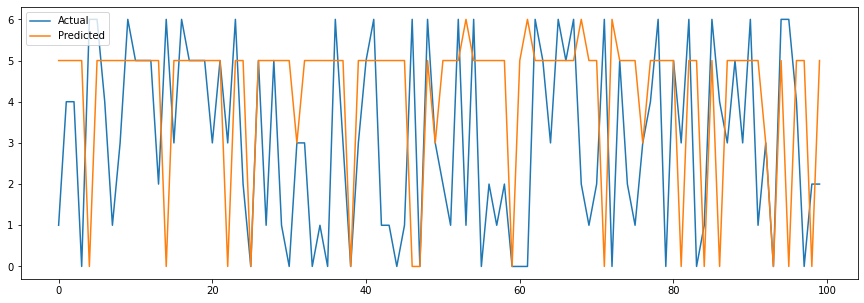

In [ ]:
#actual vs predicted
fig = plt.figure(figsize=(15,5))

actual = predictedEmotion(y_m_test)[0:100]
predicted = predictedEmotionArray[0:100]
plt.plot(actual)
plt.plot(predicted)
plt.legend(['Actual', 'Predicted'], loc='upper left')
my_yticks = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
plt.yticks(np.arrange(0,6,1),my_yticks)
plt.ylabel('emotion')
plt.xlabel('image')
plt.show()

In [ ]:
#recall,precision,F1 score

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(predictedEmotion(y_m_test), predictedEmotionArray)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


precision: [0.30666667 0.22222222 0.         0.53333333 0.         0.26024096
 0.2       ]
recall: [0.26136364 0.02247191 0.         0.12698413 0.         0.864
 0.06930693]
fscore: [0.28220859 0.04081633 0.         0.20512821 0.         0.4
 0.10294118]
support: [ 88  89  56  63  27 125 101]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


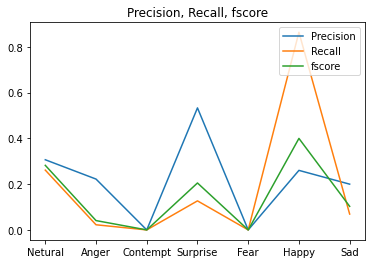

In [ ]:
x = np.array([0,1,2,3,4,5,6])

my_xticks = ['Netural','Anger','Contempt','Surprise','Fear','Happy','Sad']
plt.xticks(x, my_xticks)

plt.plot(precision)
plt.plot(recall)
plt.plot(fscore)

plt.title('Precision, Recall, fscore')
plt.legend(['Precision', 'Recall' , 'fscore'], loc='upper right')

plt.show()